<a href="https://colab.research.google.com/github/irenetsk/mastersthesis/blob/main/netx_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## fw

In [ ]:
!pip install umap-learn
import umap
import numpy as np

In [ ]:
import networkx as nx

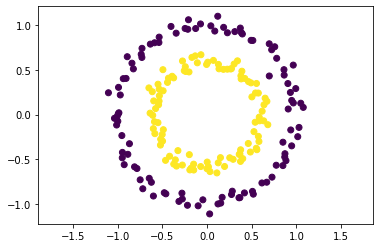

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, shuffle=False, noise=.05, factor=0.6)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

In [ ]:
rng = np.random.default_rng()
numbers = rng.choice(X.shape[0], size=int(X.shape[0]*.8), replace=False)
numbers

array([ 84, 126,  22, 125, 107, 148, 115,  69,   5, 170,  52,   0, 149,
       146,  72, 152,  21, 112, 109,   8,  12, 132, 111, 165,  66,  99,
        20, 103, 187, 189,  70,  41, 106, 177, 145, 184, 140,  86, 157,
        77,  15,  25,  58, 163, 162, 174, 102,  97,  96, 169,  36,   9,
        90, 139, 136, 197, 144, 141,  75, 158,  93,  16, 182,  53, 151,
       199, 147,  68,  56,  43,   7,  42,  80, 181, 110,  57, 192,  91,
        98,  83, 167,  18, 168, 196,  48,  10, 164, 183,  54, 161, 143,
       154,  95, 114,   2,  40, 117,   3,  23, 119, 129, 171, 121,  62,
        61, 153, 138, 113, 191, 135,  67,  94,  85,  79, 133,  47,  14,
       175,  30, 122, 160,  17, 188, 159,  73, 198,  82, 100,  31,  71,
        27, 155, 180,  49, 173,  13,  92, 166,  74, 150, 186, 185, 131,
        35, 134,  59, 190,  81, 194, 118,  55,  24,  60, 105, 127,  65,
        50,  78,  76, 193])

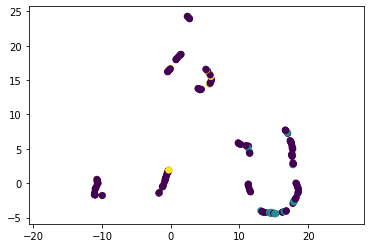

In [ ]:
# TODO masked training data
y_masked = y.copy()
y_masked[numbers] = -1

reducer = umap.UMAP(n_components=2, n_neighbors=5)
X_umap = reducer.fit_transform(X, y_masked)

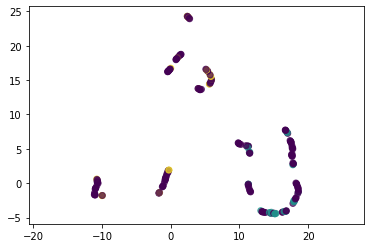

In [ ]:
plt.figure()
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_masked, alpha=.7)
plt.axis('equal')
plt.show()

In [ ]:
print(reducer.graph_.todense()[:5, :5])
print(X[:5, :])
print(X_umap[:5, :])

[[0.         0.9142159  0.6177748  1.         0.44209993]
 [0.9142159  0.         1.         0.86316955 0.6705901 ]
 [0.6177748  1.         0.         0.62216514 1.        ]
 [1.         0.86316955 0.62216514 0.         0.4909776 ]
 [0.44209993 0.6705901  1.         0.4909776  0.        ]]
[[1.04839799 0.11870717]
 [0.9977121  0.11795491]
 [0.95889855 0.1184776 ]
 [1.04347603 0.15051425]
 [0.90267483 0.1445692 ]]
[[10.042446   3.8104923]
 [ 9.931308   3.7451816]
 [ 9.992254   3.804986 ]
 [ 9.923349   3.6585464]
 [ 9.858872   3.673802 ]]


In [ ]:
# print(reducer.graph_)

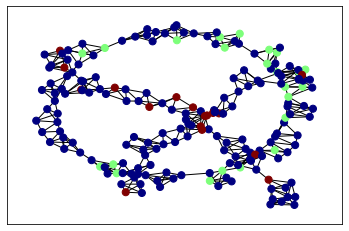

In [ ]:
G = nx.from_scipy_sparse_matrix(reducer.graph_)

# pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = y_masked, node_size = 50)
# nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='k', arrows=False)
# nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
# nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()

In [ ]:
length = nx.multi_source_dijkstra_path_length(G, sources={0, 4})
length2 = nx.multi_source_dijkstra_path_length(G, sources={100, 104})

In [ ]:
n = 40
if n in length:
  print(length[n])
else:
  print("inf")

if n in length2:
  print(length2[n])
else:
  print("inf")


8.533272236585617
inf


## et

**STEPS**
1. DATA > SBERT VECTORS 
2. UMAP: fit_transform with *X_train* (includes unlabeled) + *y_train*
3. UMAP: transform *X_test*
4. JOIN the 2 UMAP embeddings into 1
5. PASS embedding through NetworkX (how? i dont have a graph of both)
6. FOR LOOP to find the test elements (X_test), where the closest distance to each class cluster (cluster of the KNOWN labeled points of X_train) will indicate the class that this point was assigned.
7. match cluster to class -> evaluate by cross checking with y_test.

**new steps**
1. DATA > SBERT VECTORS 
2. join *X_train* (includes unlabeled) + *X_test* into a new "X_train"
3. create *masked* y_test
4. join *y_train* with *masked y_test*
5. UMAP: fit_transform "*X_train*"
6. PASS umap object graph through NetworkX
7. FOR LOOP to find the test elements (X_test), where the closest distance to each class cluster (cluster of the KNOWN labeled points of X_train) will indicate the class that this point was assigned.
8. match cluster to class -> evaluate by cross checking with *real* y_test.

In [1]:
%%capture
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/
! pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
!pip install umap-learn
import umap
import numpy as np
import networkx as nx

In [46]:
# READSPEAKER SENTENCES
angrysents = []
with open("./thesis/readspeaker_annots/emotion_02_anger.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    angrysents.append(sent)
angrylabels = ['4' for i in range(len(angrysents))]
enthusents = []
with open("./thesis/readspeaker_annots/emotion_03_happy.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    enthusents.append(sent)
enthulabels = ['1' for i in range(len(enthusents))]
sadsents = []
with open("./thesis/readspeaker_annots/emotion_04_sadness.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    sadsents.append(sent)
sadlabels = ['3' for i in range(len(sadsents))]
# MY ANNOTATIONS
trainsents = []
with open("./thesis/myannotations/sents.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    trainsents.append(sent)
trainlabels = []
with open("./thesis/myannotations/labels.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for label in f:
    trainlabels.append(label)
with open("./thesis/myannotations/moreneutral_sents.txt", encoding='utf-8') as f:
  f = (f.read()).split("\n")
  for sent in f:
    trainsents.append(sent)
  for i in range(len(f)):
    trainlabels.append('2')
rs_sents = angrysents + enthusents + sadsents
rs_labels = angrylabels + enthulabels + sadlabels
combinedsents = trainsents + rs_sents
combinedlabels = trainlabels + rs_labels
X_lab, X_unlab = [],[]
y_lab, y_unlab = [],[]
with open("thesis/corpora/eng-simple_wikipedia_2021_10K-sentences.txt", encoding='utf-8') as f1:
  f1 = (f1.read()).split("\n")
  with open("thesis/corpora/eng-uk_web-public_2018_10K-sentences.txt", encoding='utf-8') as f2:
    f2 = (f2.read()).split("\n")
    for i, line in enumerate(f1+f2):
        sent = (line[(len(str(i+1))):]).strip()                                     # removes the line number and the tab char
        if sent in trainsents:
          X_lab.append(sent)
          y_lab.append(combinedlabels[combinedsents.index(sent)])
        else:
          X_unlab.append(sent)
          y_unlab.append(-1)
for i, sent in enumerate(rs_sents):
  X_lab.append(sent)
  y_lab.append(combinedlabels[combinedsents.index(sent)])

X_unlabT = X_unlab[:500]
y_unlabT = y_unlab[:500]
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_lab, y_lab, random_state=42, train_size=0.7)
sbert = SentenceTransformer('paraphrase-MiniLM-L3-v2')                  # https://www.sbert.net/docs/pretrained_models.html
train_data = sbert.encode(X_train_split+X_unlabT)
train_labels = np.array([int(i) for i in y_train_split + y_unlabT])
test_data = sbert.encode(X_test_split)
test_labels = np.array([int(i) for i in y_test_split])
# classes = ['happy','neutral','sad','angry']

In [47]:
X_train = np.concatenate((train_data, test_data), axis=0)
masked = np.array([-1 for i in range(len(test_labels))])
y_train = np.concatenate((train_labels, masked), axis=0)

In [48]:
happy, neutral, sad, angry = [], [], [], []
for i, label in enumerate(y_train):
  if label == 1:
    happy.append(i)
  if label == 2:
    neutral.append(i)
  if label == 3:
    sad.append(i)
  if label == 4:
    angry.append(i)
# happyset, neutralset, sadset, angryset = set(happy), set(neutral), set(sad), set(angry)

In [49]:
mapper = umap.UMAP(n_neighbors=15, n_components=2)
X_umap = mapper.fit_transform(X_train, y_train)
G = nx.from_scipy_sparse_matrix(mapper.graph_)

In [ ]:
pos = nx.kamada_kawai_layout(G)

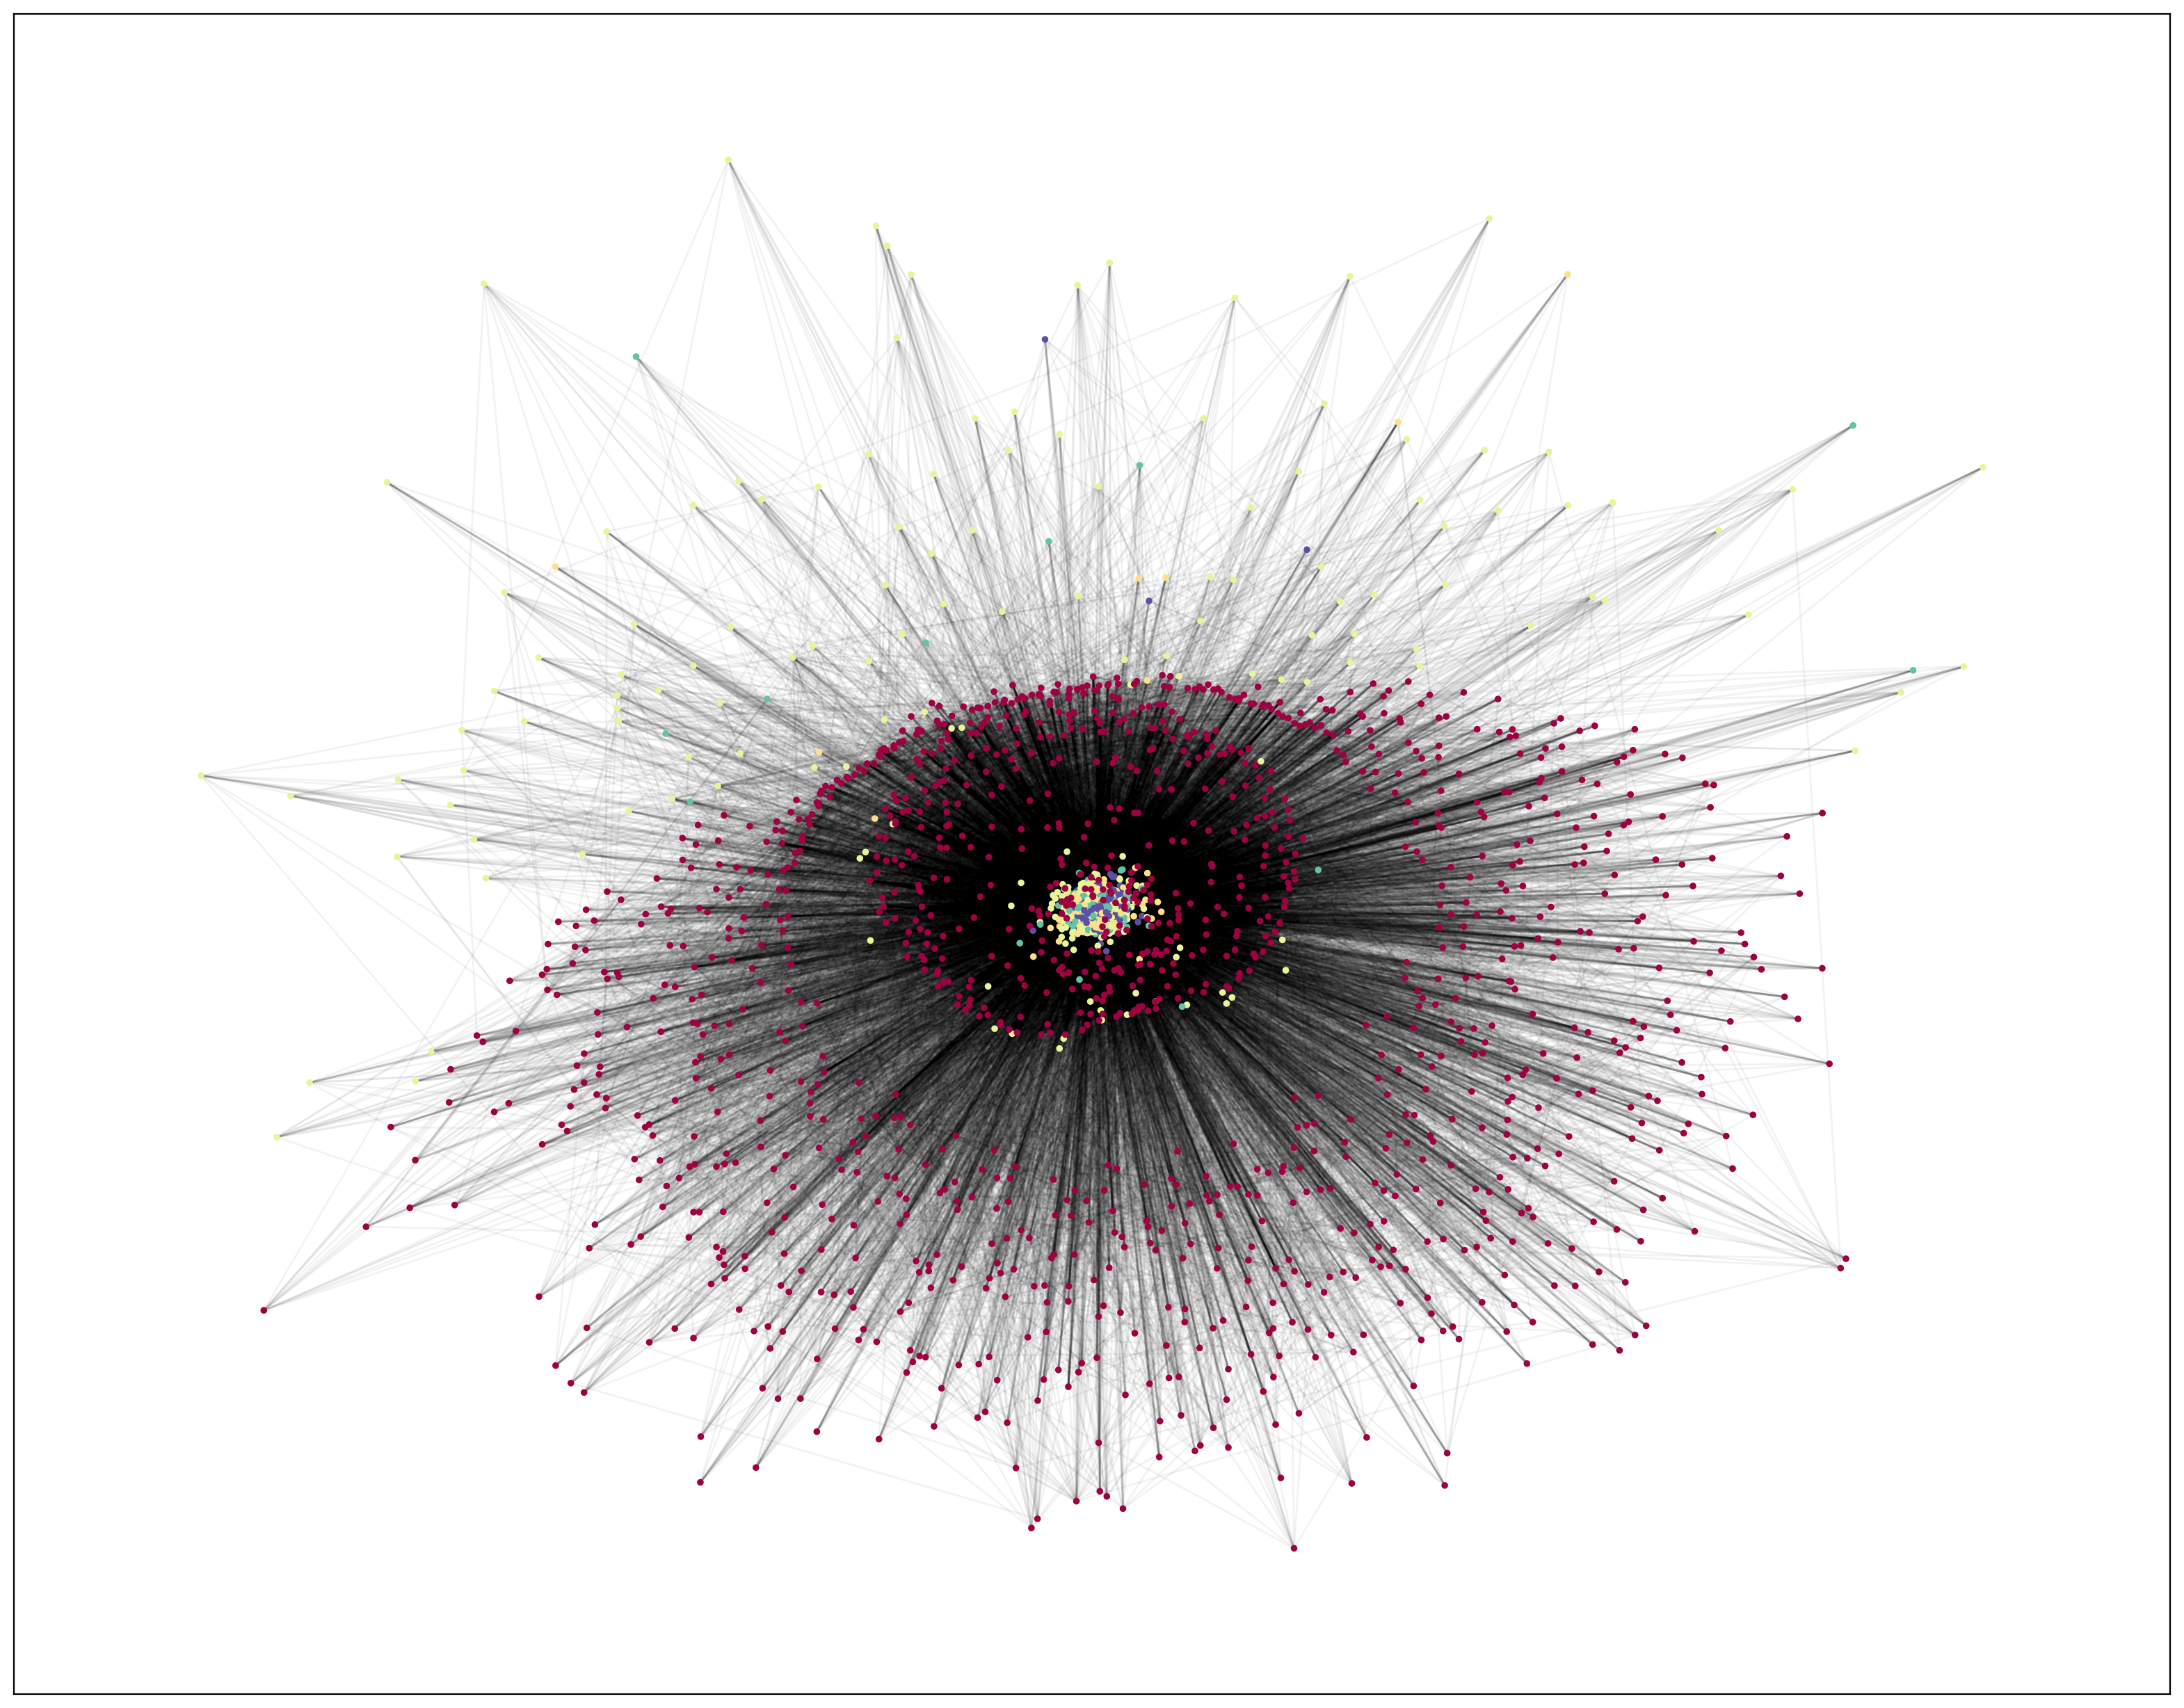

In [100]:
labels = ["unknown","happy","neutral","sad","angry"]
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20, 16),dpi=200)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('Spectral'), node_color = y_train, node_size=6, alpha=2.0)
nx.draw_networkx_edges(G, pos, edge_color='black', arrows=False, alpha=0.05)
plt.show()

In [10]:
happylengths = nx.multi_source_dijkstra_path_length(G, sources=happy)
neutrallengths = nx.multi_source_dijkstra_path_length(G, sources=neutral)
sadlengths = nx.multi_source_dijkstra_path_length(G, sources=sad)
angrylengths = nx.multi_source_dijkstra_path_length(G, sources=angry)

predicted = dict()
# for i in range(11113,11891):
for i in range(len(X_umap)-778,len(X_umap)):
  lengths = list()
  lengths.append(happylengths[i])
  lengths.append(neutrallengths[i])
  lengths.append(sadlengths[i])
  lengths.append(angrylengths[i])
  predicted[i] = lengths.index(min(lengths)) + 1

In [32]:
truelabels = list(test_labels)
correct = 0
for i, pair in enumerate(predicted.items()):
  if pair[1] == truelabels[i]:
    correct+=1
  else:
    continue
print("accuracy: ", correct/len(test_labels))

accuracy:  0.455012853470437 354


In [45]:
for dimensions in [3,5,10,15,20,30,40,50,80,100,150, 200,250,300]:
# for dimensions in [5,15,20,30,40,80,150, 250, 300]:
  mapper = umap.UMAP(n_neighbors=10, n_components=dimensions)
  X_umap = mapper.fit_transform(X_train, y_train)
  G = nx.from_scipy_sparse_matrix(mapper.graph_)

  happylengths = nx.multi_source_dijkstra_path_length(G, sources=happy)
  neutrallengths = nx.multi_source_dijkstra_path_length(G, sources=neutral)
  sadlengths = nx.multi_source_dijkstra_path_length(G, sources=sad)
  angrylengths = nx.multi_source_dijkstra_path_length(G, sources=angry)

  predicted = dict()
  # for i in range(11113,11891):
  for i in range(len(X_umap)-778,len(X_umap)):
    lengths = list()
    lengths.append(happylengths[i])
    lengths.append(neutrallengths[i])
    lengths.append(sadlengths[i])
    lengths.append(angrylengths[i])
    predicted[i] = lengths.index(min(lengths)) + 1

  truelabels = list(test_labels)
  correct = 0
  for i, pair in enumerate(predicted.items()):
    if pair[1] == truelabels[i]:
      correct+=1
    else:
      continue
  print(dimensions, "accuracy: ", correct/len(test_labels))

3 accuracy:  0.42802056555269924
5 accuracy:  0.47429305912596403
10 accuracy:  0.4498714652956298
15 accuracy:  0.45758354755784064
20 accuracy:  0.4524421593830334
30 accuracy:  0.4704370179948586
40 accuracy:  0.4190231362467866
50 accuracy:  0.4691516709511568
80 accuracy:  0.4537275064267352
100 accuracy:  0.42930591259640105
150 accuracy:  0.44601542416452444
200 accuracy:  0.4241645244215938
250 accuracy:  0.4601542416452442
300 accuracy:  0.43573264781491


### visualizations

In [12]:
# %%capture
# ! pip install umap-learn[plot]
# import umap.plot
# import matplotlib as plt

In [13]:
# umap.plot.connectivity(mapper, show_points=True, edge_cmap=plt.cm.Greens), umap.plot.connectivity(mapper)

In [14]:
# import pandas as pd
# hover_data = pd.DataFrame({'index':np.arange(len(X_train)),'label':y_train})
# hover_data['sentiment'] = hover_data.label.map({-1:'UNKNOWN', 1:'happy', 2:'neutral', 3:'sad', 4:'angry'})
# umap.plot.output_notebook()
# p = umap.plot.interactive(mapper, labels=y_train, hover_data=hover_data, point_size=2)
# umap.plot.show(p)

In [15]:
# plt.figure()
# # plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_masked, alpha=.7)
# plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train, alpha=.7)
# plt.axis('equal')
# plt.show()

In [16]:
# print(mapper.graph_.todense()[:5, :5])
# print(X_train[:5, :])